In [14]:
import xarray as xr
import os
import earthaccess

In [15]:

# Create search query for 1980-01-01 Cloud OPeNDAP URL
results = earthaccess.search_data(
    short_name="M2T1NXAER",
    version='5.12.4',
    temporal=('1980-02-01', '1980-02-01'), # This will stream one granule, but can be edited for a longer temporal extent
    bounding_box=(-180, 0, 180, 90)
)

In [16]:

# Parse out URL from request, add to OPeNDAP URLs list for querying multiple granules with constraint expressions
opendap_urls = []
for item in results:
    for urls in item['umm']['RelatedUrls']:  # Iterate over RelatedUrls in each request step
        if 'OPENDAP' in urls.get('Description', '').upper():  # Check if 'OPENDAP' is in the Description
            # Extract OPeNDAP URL
            url = urls['URL']

            # Subset TOTEXTTAU, lat, lon, and time
            # To view all variables, comment out these two lines
            ce = "?dap4.ce=/{}%3B/{}%3B/{}%3B/{}".format("TOTEXTTAU", "lat", "lon", "time")
            url = url + ce

            # Add URL to list
            opendap_urls.append(url)

In [17]:
opendap_urls

['https://opendap.earthdata.nasa.gov/collections/C1276812830-GES_DISC/granules/M2T1NXAER.5.12.4%3AMERRA2_100.tavg1_2d_aer_Nx.19800201.nc4?dap4.ce=/TOTEXTTAU%3B/lat%3B/lon%3B/time']

In [18]:

try:
    # Load dataset object and metadata, but don't open the values yet
    # NOTE: When opening HDF files, the group to be accessed must be specified with the "group=" parameter. 
    #       E.g., for GPM IMERG, group="Grid" must be entered or an error will occur
    # Remove the session parameter if you are just using a .netrc file to authenticate
    ds = xr.open_mfdataset(opendap_urls, engine="pydap")
except OSError as e:
    print('Error', e)
    print('Please check that your .edl_token file exists and is valid, or that your username/password were entered correctly.')
    raise


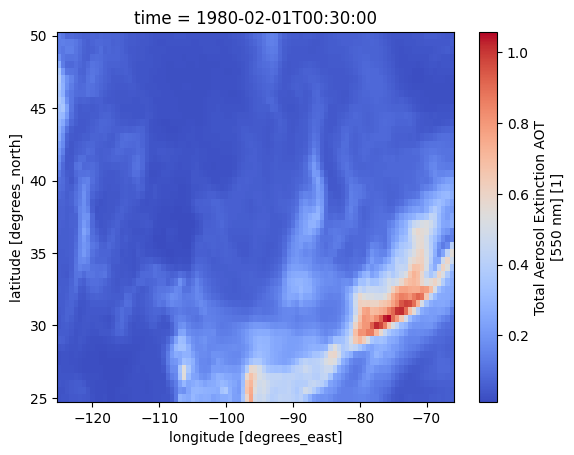

In [19]:

# Define latitude and longitude bounds for CONUS
lat_min, lat_max = 25, 50  # Latitude bounds
lon_min, lon_max = -125, -66  # Longitude bounds

# Subset the dataset based on lat/lon bounds, which is performed server-side
ds_conus = ds.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Plot the first timestep of the 2-meter temperature variable from the subsetted dataset
ds_conus['TOTEXTTAU'].isel(time=0).plot(cmap='coolwarm')